In [4]:
import os
import tarfile
import urllib.request
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set the download root and paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Function to load housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Fetch and load the data
fetch_housing_data()
housing_data = load_housing_data()

# Select relevant features: longitude, latitude, and median_income
housing_set= housing_data[['longitude', 'latitude', 'median_income']]

# Normalize the data
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_set)




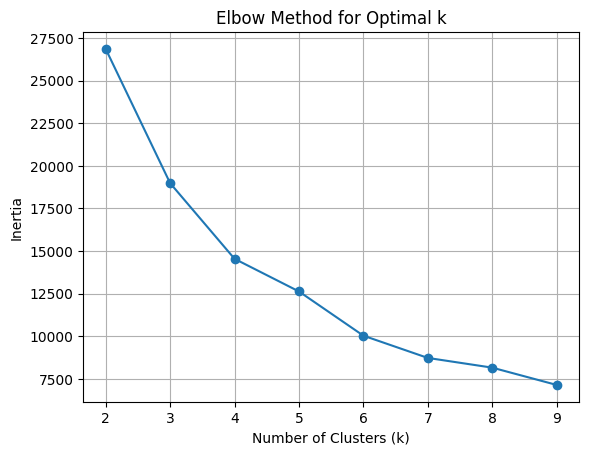

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range for cluster numbers to evaluate
k_values = range(2, 10)
inertia_values = []

# Fit K-Means for each k value and record inertia for evaluation
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(housing_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot inertia to visualize the 'elbow'
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
from sklearn.cluster import KMeans

# Define a range for cluster numbers to evaluate
k_values = range(2, 10)
inertia_values = []

# Fit K-Means for each k value and record inertia for evaluation
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(housing_scaled)
    inertia_values.append(kmeans.inertia_)

# Create a DataFrame to display k values and inertia values as a table
inertia_table = pd.DataFrame({
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
})

print(inertia_table)


   Number of Clusters (k)       Inertia
0                       2  26860.983521
1                       3  18987.366224
2                       4  14547.724175
3                       5  12632.865174
4                       6  10039.010938
5                       7   8732.982646
6                       8   8163.094032
7                       9   7149.206770


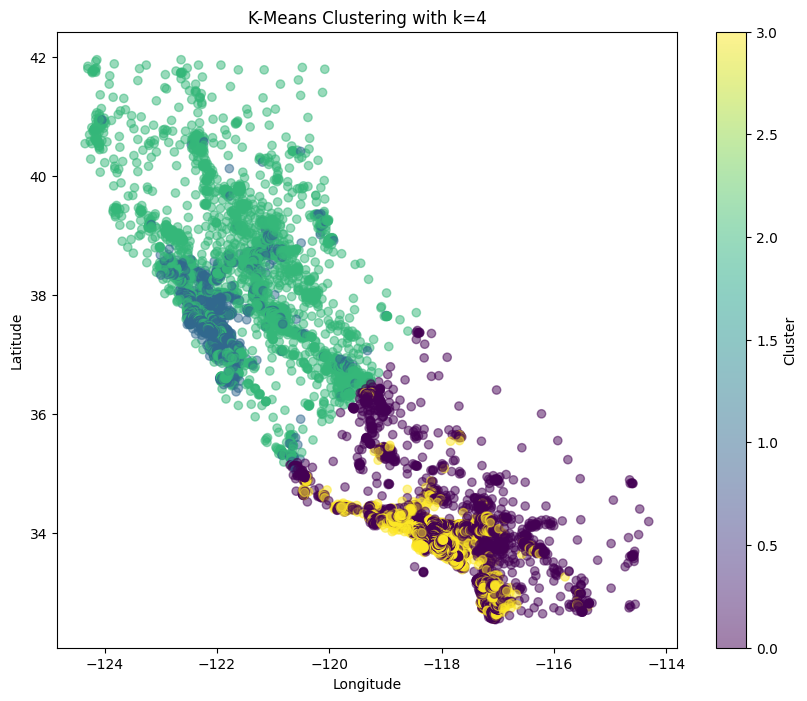

In [7]:
# Choose an optimal k based on the elbow method
optimal_k = 4  # Example, choose based on elbow method results
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
housing_data['cluster'] = kmeans_optimal.fit_predict(housing_scaled) # Changed housing to housing_data

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['cluster'], cmap='viridis', alpha=0.5) # Changed housing to housing_data
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.show()

For k = 2, the average silhouette score is 0.5482
For k = 3, the average silhouette score is 0.5180
For k = 4, the average silhouette score is 0.4352
For k = 5, the average silhouette score is 0.4101
For k = 6, the average silhouette score is 0.3985
For k = 7, the average silhouette score is 0.3723
For k = 8, the average silhouette score is 0.3667
For k = 9, the average silhouette score is 0.3462


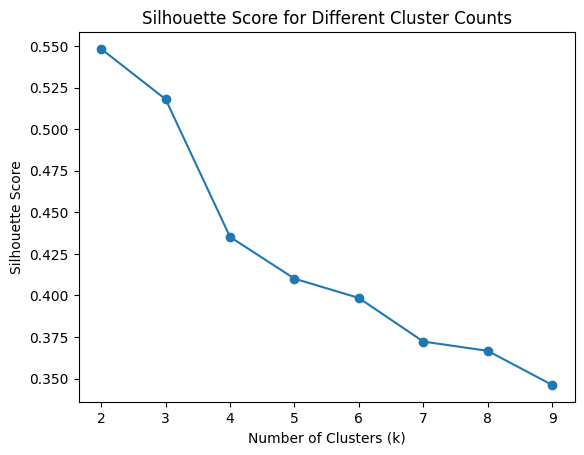

In [8]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of k values to evaluate
k_values = range(2, 10)
silhouette_scores = []

# Calculate silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(housing_scaled)
    silhouette_avg = silhouette_score(housing_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the average silhouette score is {silhouette_avg:.4f}")

# Plot silhouette scores to visualize the optimal k
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Counts')
plt.show()


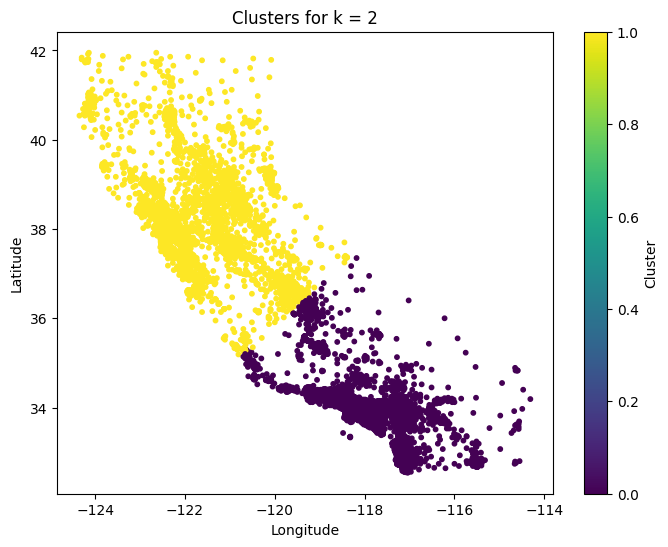

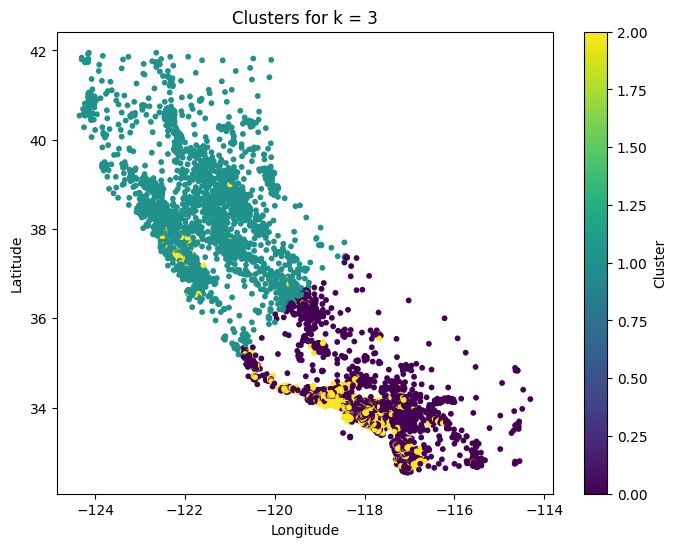

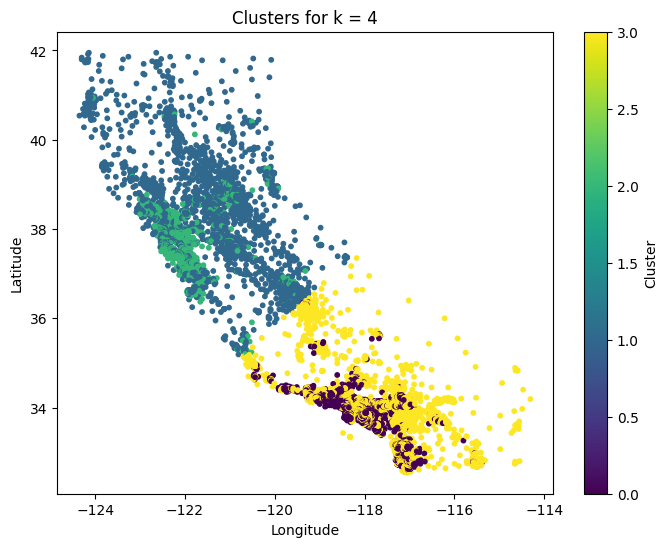

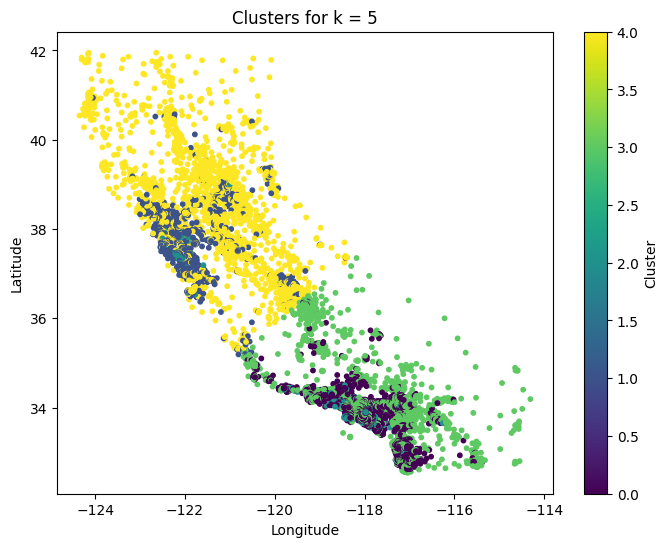

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Set the download root and paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Function to load housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()
# Define k values to compare
k_values = [2, 3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    housing['Cluster'] = kmeans.fit_predict(housing[['longitude', 'latitude', 'median_income']])

    # Scatter plot for geographic distribution of clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(housing['longitude'], housing['latitude'], c=housing['Cluster'], cmap='viridis', s=10)
    plt.title(f'Clusters for k = {k}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='Cluster')
    plt.show()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

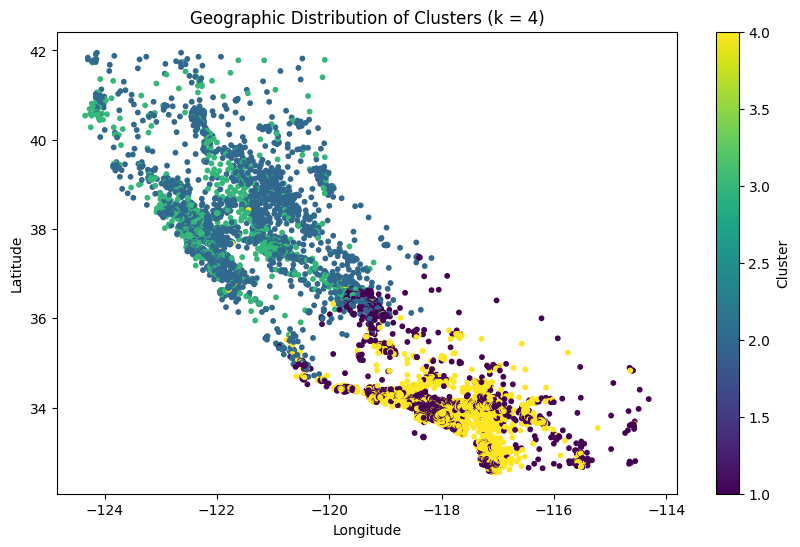

In [20]:
import os
import urllib.request
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Function to load housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Fetch and load data
fetch_housing_data()
housing = load_housing_data()

# Check the first few rows of the DataFrame
print(housing.head())

# Check for missing values and data types
print(housing.info())

# Select features for clustering
features = housing[['longitude', 'latitude', 'median_income', 'housing_median_age', 'population']]

# Check for any missing values in the selected features
print(features.isnull().sum())

# Check for non-finite values (inf) in the relevant columns using numpy
non_finite_counts = features[['median_income', 'housing_median_age', 'population']].apply(lambda x: np.isinf(x).sum())
print("Non-finite value counts:\n", non_finite_counts)

# Replace infinite values with NaN
features = features.replace([float('inf'), -float('inf')], pd.NA)

# Drop any rows with NaN values before scaling
features = features.dropna()

# Scale the features
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(features)

# Define the optimal number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
housing['Cluster'] = kmeans.fit_predict(housing_scaled)+1

# Check that the 'Cluster' column is correctly assigned
print(housing['Cluster'].value_counts())

# Inspect the DataFrame before aggregation
print(housing[['Cluster', 'median_income', 'housing_median_age', 'population']].head(10))

# Calculate mean values of key features for each cluster with explicit aggregation
try:
    cluster_summary = housing.groupby('Cluster').agg({
        'median_income': 'mean',
        'housing_median_age': 'mean',
        'population': 'mean'
    })
    print("Cluster Summary:\n", cluster_summary)
except KeyError as e:
    print(f"Error calculating cluster summary: {e}. Please check if the column names are correct.")
except TypeError as e:
    print(f"TypeError: {e}. Please check the data types and structure of your DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Optional: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(housing['longitude'], housing['latitude'], c=housing['Cluster'], cmap='viridis', s=10)
plt.title('Geographic Distribution of Clusters (k = 4)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()
